<a href="https://colab.research.google.com/github/vikasnain6353/ai-ml-intern/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

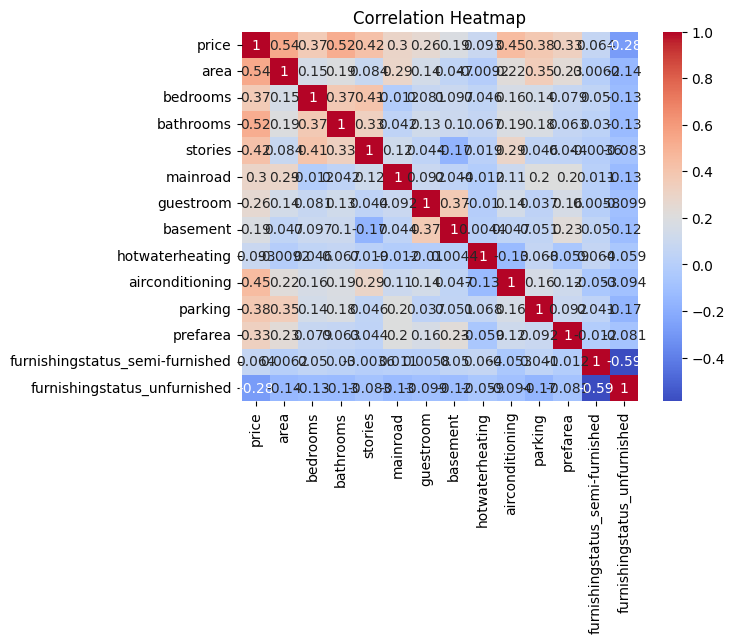

Model Coefficients: [ 2.35968805e+02  7.67787016e+04  1.09444479e+06  4.07476595e+05
  3.67919948e+05  2.31610037e+05  3.90251176e+05  6.84649885e+05
  7.91426736e+05  2.24841913e+05  6.29890565e+05 -1.26881818e+05
 -4.13645062e+05]
Model Intercept: 260032.35760741122
Mean Absolute Error (MAE): 970043.4039201637
Root Mean Squared Error (RMSE): 1324506.9600914384
R² Score: 0.6529242642153185


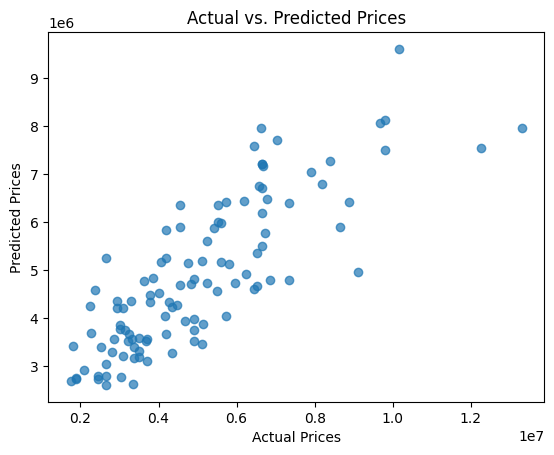

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('/content/Housing.csv')

print(data.head())
print(data.describe())
print(data.isnull().sum())

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)


sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [4]:
df = pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.head()
df.info()
df.sample(10)
df.duplicated().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


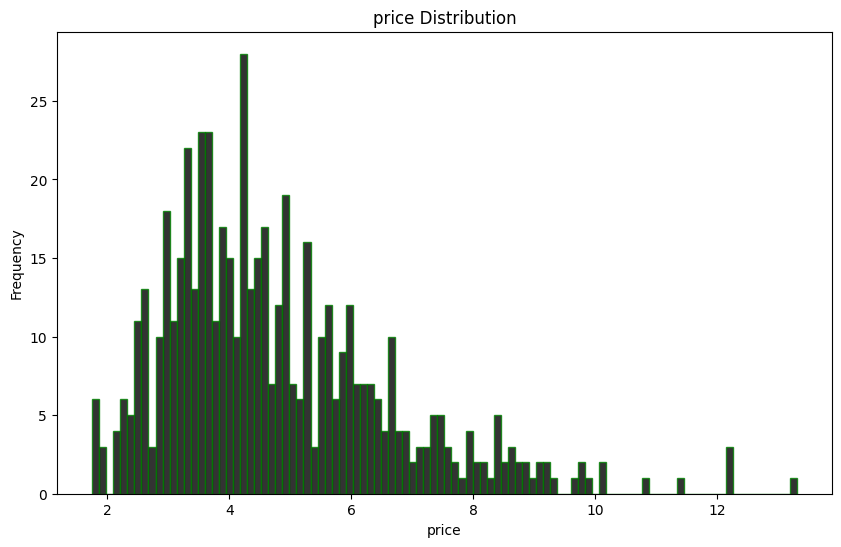

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['price']/1000000, bins=100, color='black', alpha=0.8, edgecolor='green')
plt.title('price Distribution')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()


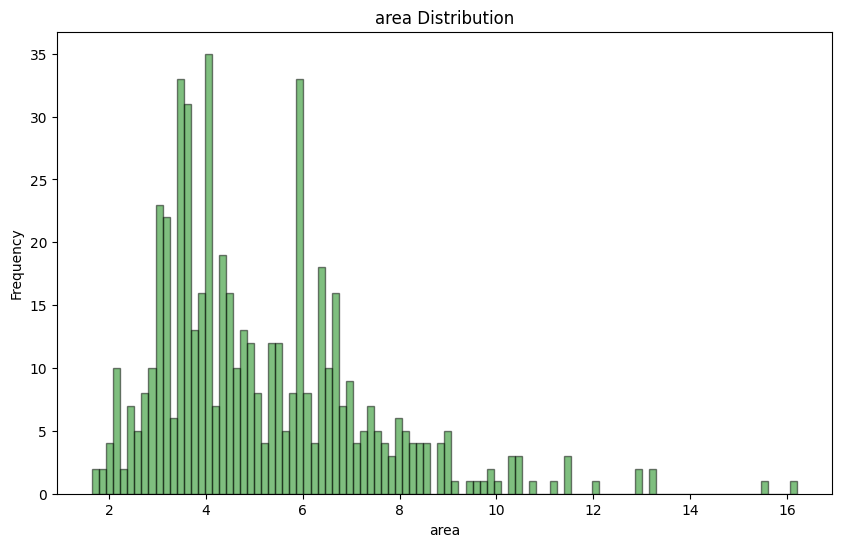

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['area']/1000, bins=100, color='green', alpha=0.5, edgecolor='black')
plt.title('area Distribution')
plt.xlabel('area')
plt.ylabel('Frequency')
plt.show()

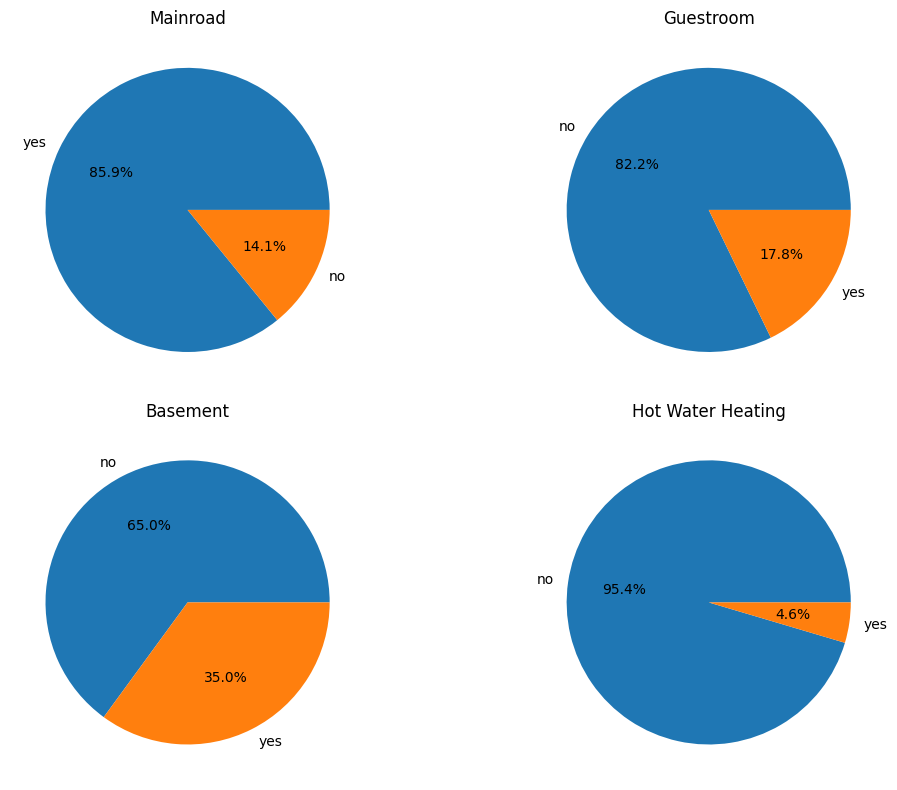

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

# mainroad
ax1 = fig.add_subplot(2, 2, 1)
data1 = df['mainroad'].value_counts()
ax1.pie(data1, labels=data1.index, autopct='%1.1f%%')
ax1.set_title('Mainroad')

# guestroom
ax2 = fig.add_subplot(2, 2, 2)
data2 = df['guestroom'].value_counts()
ax2.pie(data2, labels=data2.index, autopct='%1.1f%%')
ax2.set_title('Guestroom')

# basement
ax3 = fig.add_subplot(2, 2, 3)
data3 = df['basement'].value_counts()
ax3.pie(data3, labels=data3.index, autopct='%1.1f%%')
ax3.set_title('Basement')

# hotwaterheating
ax4 = fig.add_subplot(2, 2, 4)
data4 = df['hotwaterheating'].value_counts()
ax4.pie(data4, labels=data4.index, autopct='%1.1f%%')
ax4.set_title('Hot Water Heating')

plt.tight_layout()
plt.show()


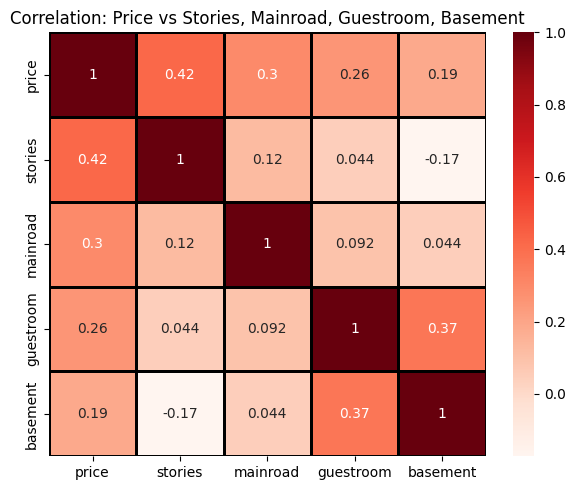

In [9]:
df_encoded = df.copy()
df_encoded['mainroad'] = df_encoded['mainroad'].map({'yes': 1, 'no': 0})
df_encoded['guestroom'] = df_encoded['guestroom'].map({'yes': 1, 'no': 0})
df_encoded['basement'] = df_encoded['basement'].map({'yes': 1, 'no': 0})

data_plotting = df_encoded[['price', 'stories', 'mainroad', 'guestroom', 'basement']].corr(method='pearson')

plt.figure(figsize=(6, 5))
sns.heatmap(data_plotting, cmap='Reds', linecolor='black', linewidths=1, annot=True)

plt.title('Correlation: Price vs Stories, Mainroad, Guestroom, Basement')
plt.tight_layout()
plt.show()


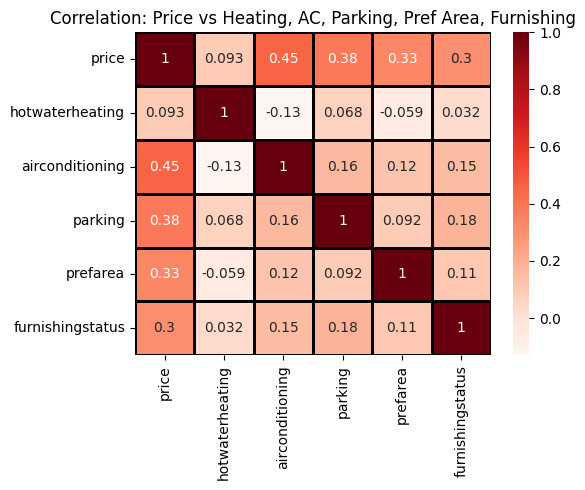

In [10]:
df_encoded = df.copy()

df_encoded['hotwaterheating'] = df_encoded['hotwaterheating'].map({'yes': 1, 'no': 0})
df_encoded['airconditioning'] = df_encoded['airconditioning'].map({'yes': 1, 'no': 0})
df_encoded['prefarea'] = df_encoded['prefarea'].map({'yes': 1, 'no': 0})

df_encoded['furnishingstatus'] = df_encoded['furnishingstatus'].map({
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
})
data_plotting = df_encoded[['price', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].corr(method='pearson')

plt.figure(figsize=(6, 5))
sns.heatmap(data_plotting, cmap='Reds', linecolor='black', linewidths=1, annot=True)

plt.title('Correlation: Price vs Heating, AC, Parking, Pref Area, Furnishing')
plt.tight_layout()
plt.show()



